In [51]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Limpiar Datos

In [52]:
import pandas as pd
import numpy as np
import datetime

def clean_data():
    data = pd.read_excel('data/base.xlsx')
# Change column names to lowercase and replace spaces with underscores and remove accents
    data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u')
# Convert 'Dia' column to string type
    data['dia'] = data['dia'].astype(str)
# Sacar el día de la semana de día, que es la mitad izquierda antes del espacio
    data['dia_semana'] = data['dia'].apply(lambda x: x.split(' ')[0])
    data['dia_mes'] = data['dia'].apply(lambda x: x.split(' ')[1])
# make 'num_Espera' column with the amount of 'Espera' turned into seconds
    data['num_espera'] = data['espera'].apply(lambda x: x.hour * 60*60 + x.minute*60 + x.second)
# make 'num_duracion' column with the amount of 'duracion' turned into seconds
    data['num_duracion'] = data['duracion'].apply(lambda x: x.hour * 60*60 + x.minute*60 + x.second)
# make 'num_entre_llegadas' column with the amount of 'entre_llegadas' turned into seconds
    data['num_entre_llegadas'] = data['entre_llegadas'].apply(lambda x: x.hour * 60*60 + x.minute*60 + x.second) 

#print amount of 'Espera' min or equal to 00:05:00
    print('Porcentaje de clientes que espera menos de 5 minutos: ',data[data['espera'] <= datetime.time(0, 5, 0)].shape[0]/data.shape[0] * 100, '%')
    print('Porcentaje de clientes con Estado Atendido',data[data['estado'] == 'Atendido'].shape[0]/data.shape[0] * 100, '%')
    data.sample(5)
    return data

data = clean_data()
data.sample(5)

Porcentaje de clientes que espera menos de 5 minutos:  97.84214170320794 %
Porcentaje de clientes con Estado Atendido 91.2762520193861 %


,mes,dia,cliente,llegada,tiposerv.,servidor,inicio_serv.,fin_serv.,estado,espera,duracion,entre_llegadas,dia_semana,dia_mes,num_espera,num_duracion,num_entre_llegadas
6368,Noviembre,Martes 6,20,8:17:31,Tecnica,Juan Lopez,8:21:31,8:31:15,Atendido,00:04:00,00:09:44,00:01:07,Martes,6,240,584,67
1682,Abril,Lunes 20,16,9:39:18,Cancelacion,Teresa Rodriguez,9:40:11,9:50:38,Atendido,00:00:53,00:10:27,00:15:41,Lunes,20,53,627,941
6999,Noviembre,Miercoles 14,42,15:26:26,Cancelacion,Dayana Perea,15:27:37,15:34:01,Atendido,00:01:11,00:06:24,00:00:02,Miercoles,14,71,384,2
6535,Noviembre,Jueves 8,1,6:01:38,Tecnica,Juan Lopez,6:02:35,6:09:48,Atendido,00:00:57,00:07:13,00:00:00,Jueves,8,57,433,0
3370,Septiembre,Martes 6,73,15:46:09,Tecnica,Josue Fandiño,15:47:36,15:57:47,Atendido,00:01:27,00:10:11,00:08:38,Martes,6,87,611,518


# Analisis de Tiempo entre arribos

## Independencia

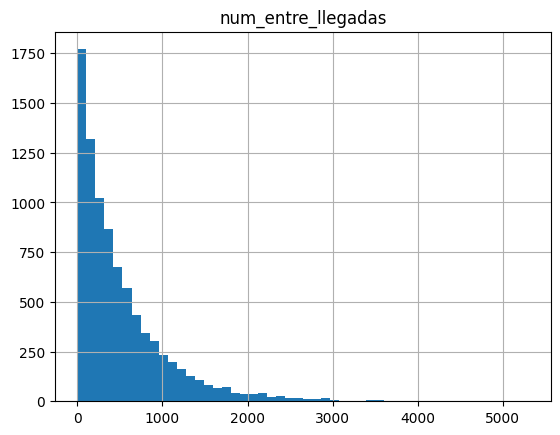

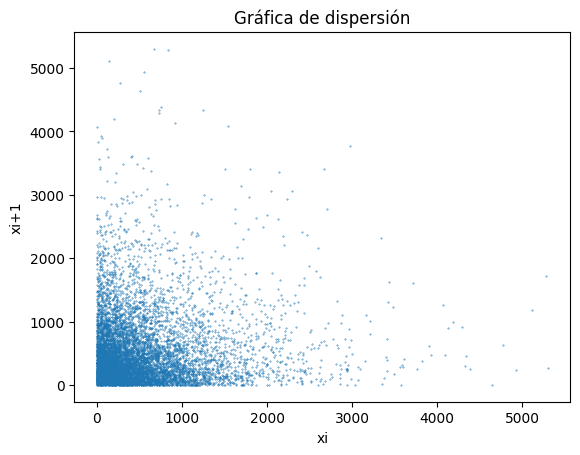

Corridas arriba y abajo
     Co = 5849
     Z = 1.8345512078243318
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
Corridas arriba y abajo para la media
     Co = 191
     Z = 0.30816875540875377
        Z0.05 = 1.959963984540054
     H0: Los numeros son independientes
     H1: Los numeros no son independientes
     ----Se acepta H0----


In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from distfit import distfit
import statsmodels as sm


def scatter_plot(x):
    """
    Gráfica de dispersión
    :param x: lista de números pseudoaleatorios
    """
    plt.scatter(x[:-1], x[1:], s=1000/len(x))
    #change dots size to be smaller
    plt.title('Gráfica de dispersión')
    plt.xlabel('xi')
    plt.ylabel('xi+1')
    plt.show()
def corridas_arriba_y_abajo(x, _alfa=0.05):
    """
    Prueba de corridas arriba y abajo
    :param x: lista de números pseudoaleatorios
    """
    n = len(x)
    mu = (2*n-1)/3
    sigma2 = (16*n-29)/90

    S = [1 if x[i] < x[i+1] else 0 for i in range(n-1)]
    Co = sum(abs(S[i] - S[i+1]) for i in range(n-2))
    Z = abs((Co - mu)/sigma2**0.5)
    print('Corridas arriba y abajo')
    print('     Co =', Co)
    print('     Z =', Z)
    print(f'        Z{_alfa} =', stats.norm.ppf(1-_alfa/2))
    print('     H0: Los números son independientes')
    print('     H1: Los números no son independientes')
    if Z < stats.norm.ppf(1-_alfa/2):
        print('     ----Se acepta H0----')
    else:
        print('     ----Se rechaza H0----')
def corridas_arriba_y_abajo_media(x, _alfa = 0.05):
    """
    Prueba de corridas arriba y abajo para la media
    :param x: lista de números pseudoaleatorios
    """
    n = len(x)
    media = 0.5

    S = [1 if x[i] < media else 0 for i in range(n)]
    Co = sum(abs(S[i] - S[i+1]) for i in range(n-1))
    n1 = sum(S)
    n0 = n - n1

    mu = (2*n0*n1)/(n) + 1/2
    sigma2 = (2*n0*n1*(2*n0*n1-n))/(n**2*(n-1))

    Z = abs((Co - mu)/sigma2**0.5)
    print('Corridas arriba y abajo para la media')
    print('     Co =', Co)
    print('     Z =', Z)
    print(f'        Z{_alfa} =', stats.norm.ppf(1-_alfa/2))
    print('     H0: Los numeros son independientes')
    print('     H1: Los numeros no son independientes')
    if Z < stats.norm.ppf(1-_alfa/2):
        print('     ----Se acepta H0----')
    else:
        print('     ----Se rechaza H0----')
data.hist(column='num_entre_llegadas', bins=50)
plt.show()
scatter_plot(data['num_entre_llegadas'].values)
corridas_arriba_y_abajo(data['num_entre_llegadas'].values)
corridas_arriba_y_abajo_media(data['num_entre_llegadas'].values)


## Homogeneidad

In [57]:
from pyhomogeneity import pettitt_test, snht_test
h = pettitt_test(data['num_entre_llegadas'].values)
print(h)
print(f'Test de Pettitt: {h[2]} < 0.05, {"si" if h[2] < 0.05 else "no"} se rechaza H0 la homogeneidad')

Pettitt_Test(h=True, cp=4071, p=0.00015, U=997889.0, avg=mean(mu1=546.4770326701056, mu2=495.9055495103373))
Test de Pettitt: 4071 < 0.05, no se rechaza H0 la homogeneidad


## Bondad de Ajuste

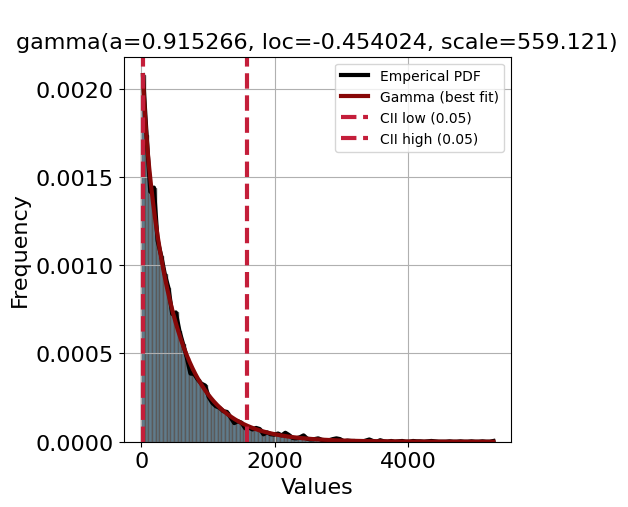

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,gamma,0.0,-0.454024,559.121144,"(0.9152661516409748,)","(0.9152661516409748, -0.45402424048329837, 559...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,halfgennorm,0.0,-0.0,407.793034,"(0.8601677241983237,)","(0.8601677241983237, -3.5868698140327503e-13, ...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,pareto,0.0,-6243.874061,6243.874061,"(13.012754218200794,)","(13.012754218200794, -6243.874060864054, 6243....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,weibull_min,0.0,-0.0,499.482161,"(0.9158905644106207,)","(0.9158905644106207, -4.528445302559136e-26, 4...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,gengamma,0.0,-0.0,577.194483,"(0.9187362920999111, 1.0348367927512525)","(0.9187362920999111, 1.0348367927512525, -6.34...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,semicircular,0.000015,2033.674234,3267.620954,(),"(2033.6742338797594, 3267.6209544572926)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,lognorm,0.000017,-0.0,0.070364,"(78.52039306723925,)","(78.52039306723925, -5e-324, 0.07036433755528851)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,weibull_max,0.00002,5301.0,1.722278,"(0.101818415800871,)","(0.101818415800871, 5301.000000000001, 1.72227...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,vonmises,2.451102,-0.486079,1,"(0.03340528628170301,)","(0.03340528628170301, -0.4860793638826184, 1)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


In [55]:
from distfit import distfit
dist = distfit(distr='full', verbose=0)
dist.fit_transform(data['num_entre_llegadas'].values)
dist.plot(figsize=(5,5))
plt.show()
dist.summary

# Analisis de Tiempo de Servicio

In [79]:
data_ = {}
for i in data['tiposerv.'].unique():
    # Filter by tipo de servicio and estado = 'Atendido'
    data_[i] = data[data['tiposerv.']==i][data['estado']!='Abandono']


## Independencia

----Tecnica----


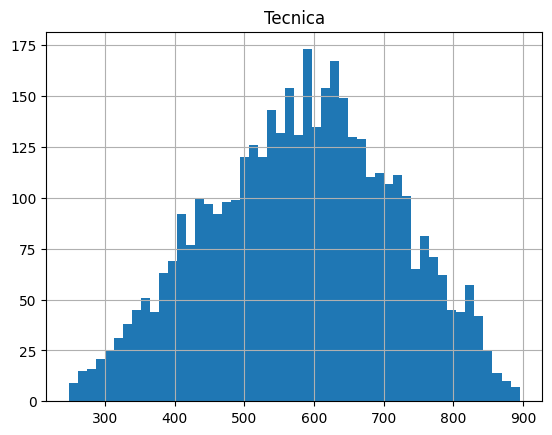

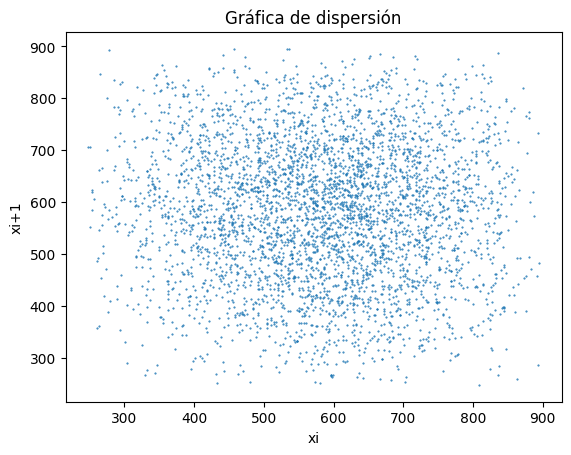

Corridas arriba y abajo
     Co = 2776
     Z = 1.3692751378391101
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----Cancelacion----


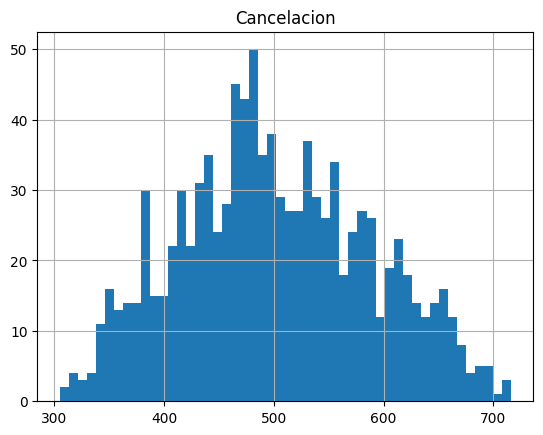

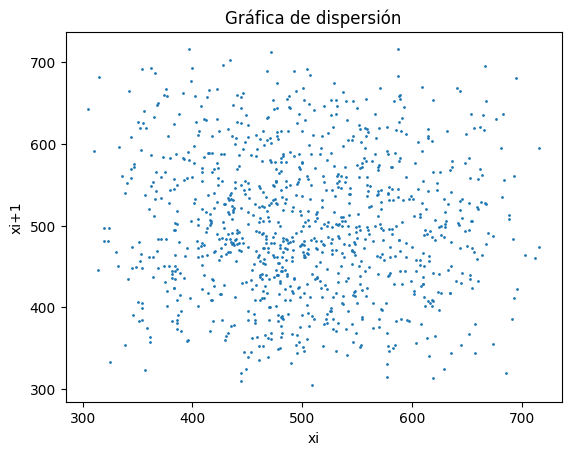

Corridas arriba y abajo
     Co = 675
     Z = 0.04969806954703981
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----Otro----


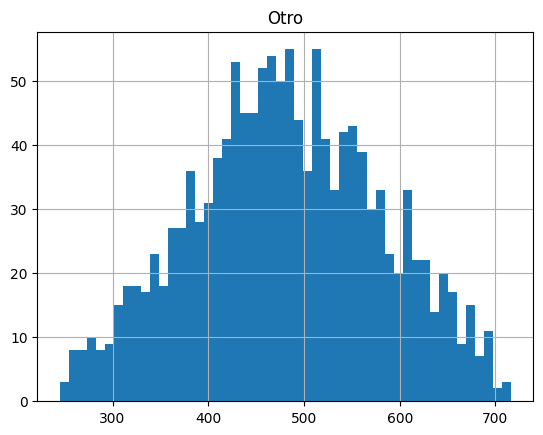

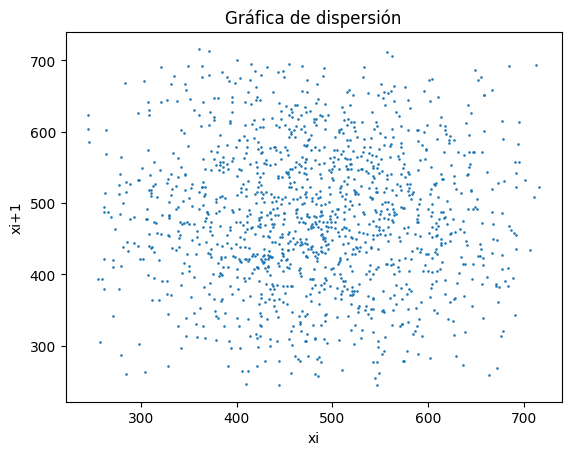

Corridas arriba y abajo
     Co = 893
     Z = 0.47350714322464693
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----Facturacion----


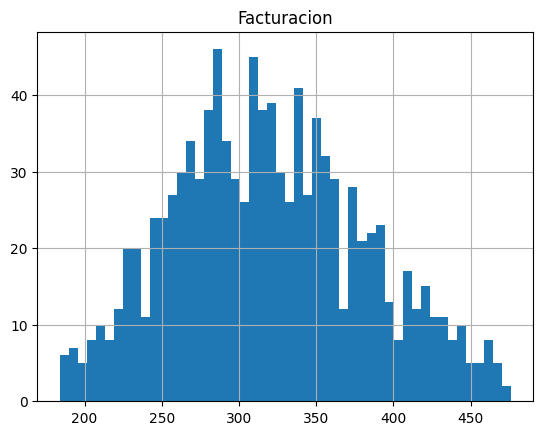

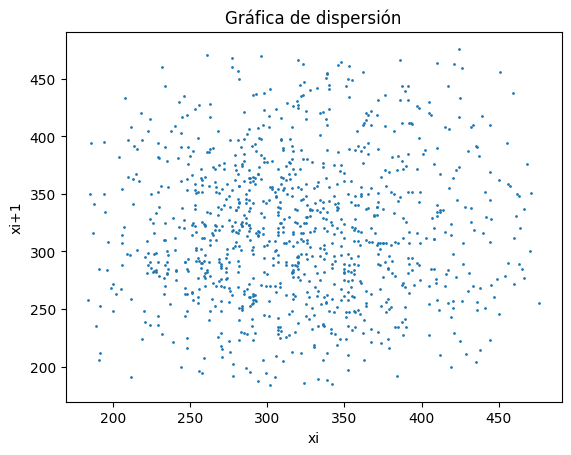

Corridas arriba y abajo
     Co = 679
     Z = 0.444221069798078
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----Cambio Plan----


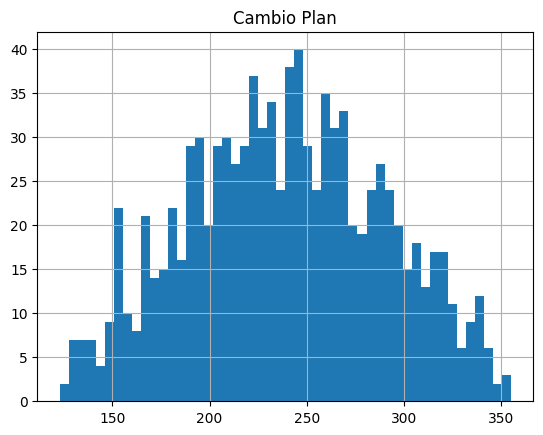

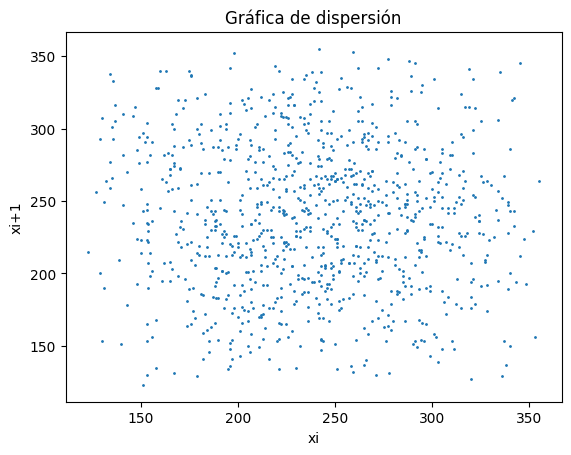

Corridas arriba y abajo
     Co = 649
     Z = 0.15189630035117052
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------


In [80]:
for i in data_:
    print(f'----{i}----')
    data_[i]['num_duracion'].hist(bins=50)
    plt.title(i)
    plt.show()
    scatter_plot(data_[i]['num_duracion'])
    corridas_arriba_y_abajo(data_[i]['num_duracion'].values)
    # corridas_arriba_y_abajo_media(data_[i]['num_duracion'].values)
    print("-------------------------------------------")

## Homogeneidad

In [81]:
for i in data_:
    print(f'----{i}----')
    h = pettitt_test(data_[i]['num_duracion'].values)
    print(f'Para los datos por tipo de servicio: {i}\nTest de Pettitt: {h[2]} < 0.05, {"si" if h[2] < 0.05 else "no"} se rechaza H0 la homogeneidad')

----Tecnica----
Para los datos por tipo de servicio: Tecnica
Test de Pettitt: 0.4208 < 0.05, no se rechaza H0 la homogeneidad
----Cancelacion----
Para los datos por tipo de servicio: Cancelacion
Test de Pettitt: 0.34215 < 0.05, no se rechaza H0 la homogeneidad
----Otro----
Para los datos por tipo de servicio: Otro
Test de Pettitt: 0.4426 < 0.05, no se rechaza H0 la homogeneidad
----Facturacion----
Para los datos por tipo de servicio: Facturacion
Test de Pettitt: 0.9852 < 0.05, no se rechaza H0 la homogeneidad
----Cambio Plan----
Para los datos por tipo de servicio: Cambio Plan
Test de Pettitt: 0.6001 < 0.05, no se rechaza H0 la homogeneidad


## Bondad de Ajuste

----Tecnica----


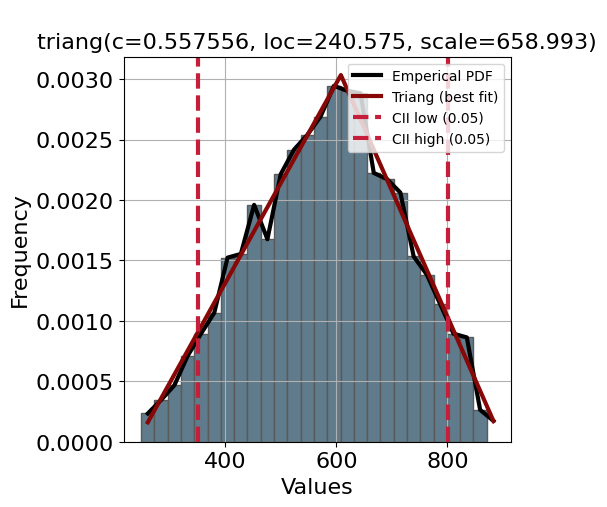

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.0,240.574875,658.992631,"(0.5575557417264498,)","(0.5575557417264498, 240.57487462928313, 658.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,gausshyper,0.000001,246.918042,682.631052,"(1.3754142503464344, 3.4640305853733677, -4.49...","(1.3754142503464344, 3.4640305853733677, -4.49...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,beta,0.000001,209.906652,701.398417,"(3.0655077272828852, 2.7102121366257848)","(3.0655077272828852, 2.7102121366257848, 209.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,johnsonsb,0.000001,177.362217,765.397004,"(-0.16555250894863602, 1.2487379694931822)","(-0.16555250894863602, 1.2487379694931822, 177...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,weibull_min,0.000001,139.495161,491.014897,"(3.7386822079482886,)","(3.7386822079482886, 139.49516103255405, 491.0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,weibull_max,0.000093,895.0,1.700553,"(0.15508869418850724,)","(0.15508869418850724, 895.0000000000001, 1.700...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,halfgennorm,0.0001,248.0,1.324706,"(0.257328463506869,)","(0.257328463506869, 248.0, 1.3247059359290563)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,exponweib,0.000131,248.0,0.251086,"(5.567730782065521, 0.13959494571549252)","(5.567730782065521, 0.13959494571549252, 247.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,powerlognorm,0.00016,247.827397,0.547105,"(0.013963299449236608, 0.5412110001015991)","(0.013963299449236608, 0.5412110001015991, 247...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----Cancelacion----


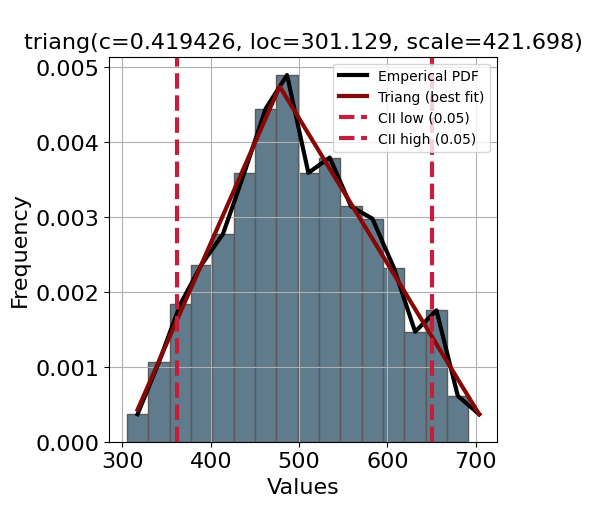

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000001,301.129129,421.697607,"(0.41942583671388245,)","(0.41942583671388245, 301.1291285525042, 421.6...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,gausshyper,0.000002,295.387602,441.344567,"(2.613075591846653, 2.798666271494679, -0.6391...","(2.613075591846653, 2.798666271494679, -0.6391...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,rice,0.000002,299.61305,97.074291,"(1.7632934036718968,)","(1.7632934036718968, 299.6130504613227, 97.074...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,beta,0.000002,296.452066,441.993478,"(2.539646327669204, 2.9357293685140355)","(2.539646327669204, 2.9357293685140355, 296.45...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,weibull_min,0.000002,282.719706,245.783778,"(2.75643804051644,)","(2.75643804051644, 282.71970595450796, 245.783...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,halfgennorm,0.000138,305.0,1.3434,"(0.2743816664191555,)","(0.2743816664191555, 304.9999999999999, 1.3434...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,invweibull,0.000156,304.994065,1.539153,"(0.28139279491283914,)","(0.28139279491283914, 304.99406513444933, 1.53...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,powerlognorm,0.000201,302.450238,2.317733,"(7.176924235026312e-07, 0.0026161529495368043)","(7.176924235026312e-07, 0.0026161529495368043,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,vonmises,0.414501,-0.877331,1,"(0.04320316418998561,)","(0.04320316418998561, -0.8773307209530898, 1)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----Otro----


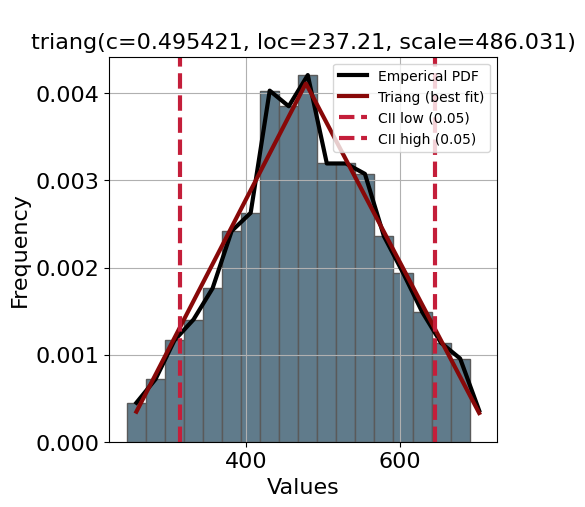

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000001,237.210361,486.030627,"(0.4954207101683704,)","(0.4954207101683704, 237.21036143200746, 486.0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,weibull_min,0.000001,186.027918,329.267499,"(3.3231775507959345,)","(3.3231775507959345, 186.02791789464982, 329.2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,gausshyper,0.000001,187.148416,679.781871,"(4.370412101640536, 3.814764682622412, -1.8640...","(4.370412101640536, 3.814764682622412, -1.8640...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,chi,0.000001,-393.362209,140.544153,"(39.19424830531733,)","(39.19424830531733, -393.36220898846875, 140.5...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,chi2,0.000001,-448.343744,5.389084,"(172.53795784183296,)","(172.53795784183296, -448.34374362527444, 5.38...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,rice,0.000112,420.992962,0.700153,"(1.3403049918910611e-10,)","(1.3403049918910611e-10, 420.99296192292104, 0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,weibull_max,0.000115,716.0,1.61469,"(0.16547533120915298,)","(0.16547533120915298, 716.0000000000002, 1.614...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,halfgennorm,0.000121,245.0,1.37922,"(0.2688490385980778,)","(0.2688490385980778, 245.0, 1.3792197826813721)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,exponweib,0.000121,245.0,0.445487,"(2.0823990232258884, 0.13682071698615292)","(2.0823990232258884, 0.13682071698615292, 244....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----Facturacion----


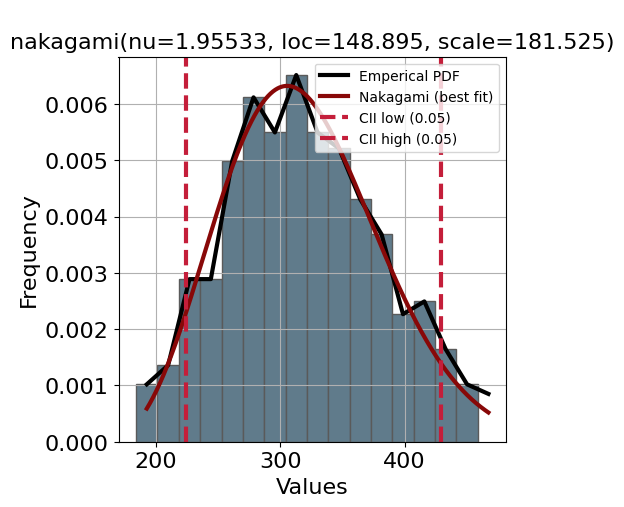

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,nakagami,0.000003,148.894539,181.52518,"(1.9553322197400702,)","(1.9553322197400702, 148.89453912206932, 181.5...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,chi,0.000003,148.89457,91.793426,"(3.9106637205229777,)","(3.9106637205229777, 148.89456979743068, 91.79...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,weibull_min,0.000003,166.857645,171.745363,"(2.6549191879142997,)","(2.6549191879142997, 166.85764498709761, 171.7...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,genextreme,0.000003,295.159213,58.804029,"(0.19627828584088042,)","(0.19627828584088042, 295.1592126404563, 58.80...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,powernorm,0.000003,234.976134,28.724069,"(0.11697083081642537,)","(0.11697083081642537, 234.97613362907066, 28.7...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,weibull_max,0.000264,476.0,1.576148,"(0.17372824689352132,)","(0.17372824689352132, 476.0000000000001, 1.576...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,exponweib,0.000284,184.0,0.395935,"(2.5275957022527873, 0.15388056068489697)","(2.5275957022527873, 0.15388056068489697, 183....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,powerlognorm,0.000351,180.932436,2.969047,"(2.5197152108566617e-06, 0.004212393605098211)","(2.5197152108566617e-06, 0.004212393605098211,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,gompertz,0.001228,183.999991,11.038523,"(3.868094950138113e-10,)","(3.868094950138113e-10, 183.9999907001066, 11....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----Cambio Plan----


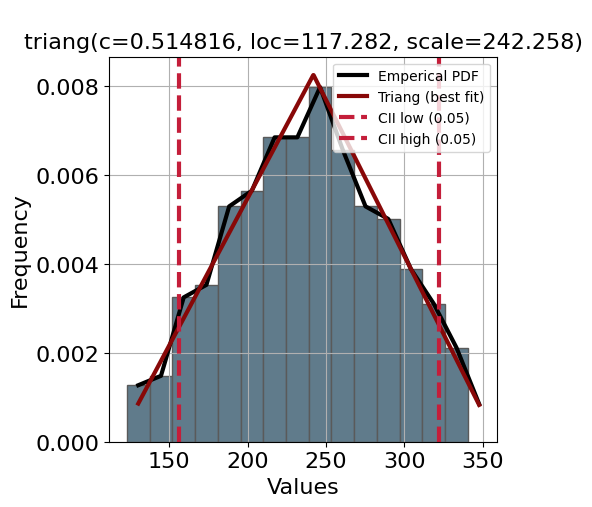

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000002,117.281505,242.258475,"(0.5148158197186122,)","(0.5148158197186122, 117.28150474043093, 242.2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,cosine,0.000003,238.882162,43.69897,(),"(238.88216160960988, 43.698970357933305)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,gausshyper,0.000003,116.482518,242.153416,"(2.4177271428870997, 2.019612895772154, -0.545...","(2.4177271428870997, 2.019612895772154, -0.545...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,rdist,0.000004,238.891548,121.459099,"(4.660349277101246,)","(4.660349277101246, 238.89154816964367, 121.45...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,beta,0.000004,117.436929,242.917476,"(2.3300311655364663, 2.3302824832751563)","(2.3300311655364663, 2.3302824832751563, 117.4...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,weibull_max,0.000373,355.0,1.522052,"(0.18363296466335483,)","(0.18363296466335483, 355.0000000000001, 1.522...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,gengamma,0.000447,123.0,0.281416,"(2.342842915078694, 0.1922718597640079)","(2.342842915078694, 0.1922718597640079, 122.99...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,powerlognorm,0.000495,120.318315,2.610394,"(4.30067985951955e-06, 0.0054739430970840944)","(4.30067985951955e-06, 0.0054739430970840944, ...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,genexpon,0.001431,122.999987,4.296246,"(0.1792966468293884, 0.06296025037700026, 2.16...","(0.1792966468293884, 0.06296025037700026, 2.16...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------


In [82]:
for i in data_:
    print(f'----{i}----')
    dist = distfit(distr='full', verbose=0)
    dist.fit_transform(data_[i]['num_duracion'].values)
    dist.plot(figsize=(5,5))
    plt.show()
    display(dist.summary)
    print("-------------------------------------------")